### Importing Libraries and Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from datasets import load_dataset

data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Filter data for only United States

In [3]:
df_US = df[df['job_country']=='United States']

### Explode the Skills

In [4]:
df_skills = df_US.copy()
df_exploded = df_skills.explode('job_skills')
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,python,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,c++,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,java,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,matlab,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,r,"{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,sql,"{'analyst_tools': ['tableau'], 'programming': ..."
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,python,"{'analyst_tools': ['tableau'], 'programming': ..."


### Count the Skills for each job title

In [5]:
skills_count = df_exploded.groupby(['job_skills','job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skills_count')
df_skills_count = df_skills_count.sort_values('skills_count', ascending=False)

### Find the Top 3 Jobs

In [6]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

### Plot the skills count for the top 3 jobs

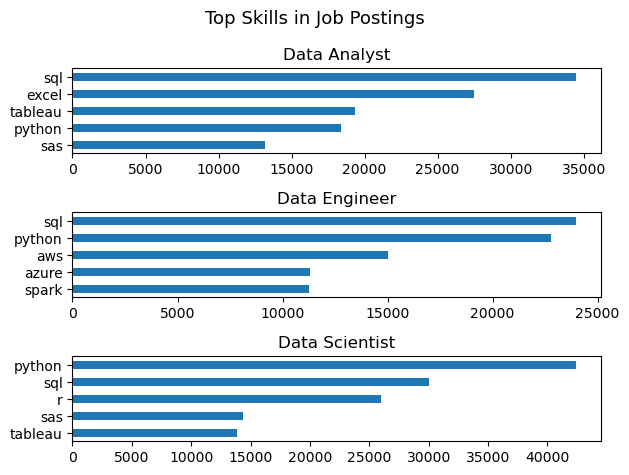

In [7]:
fig , ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skills_count', ax=ax[i], title  = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Top Skills in Job Postings', fontsize=13)
fig.tight_layout()
plt.show()

### Converting skill counts to percentage

In [8]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_skills,job_title_short,skills_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [10]:
df_skills_percent = pd.merge(df_skills_count, df_job_title_count, how='left', on ='job_title_short')

df_skills_percent['skill_percent'] = 100* df_skills_percent['skills_count']/df_skills_percent['jobs_total']

df_skills_percent

,job_skills,job_title_short,skills_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


### Plotting the skills perentage for top 3 jobs

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


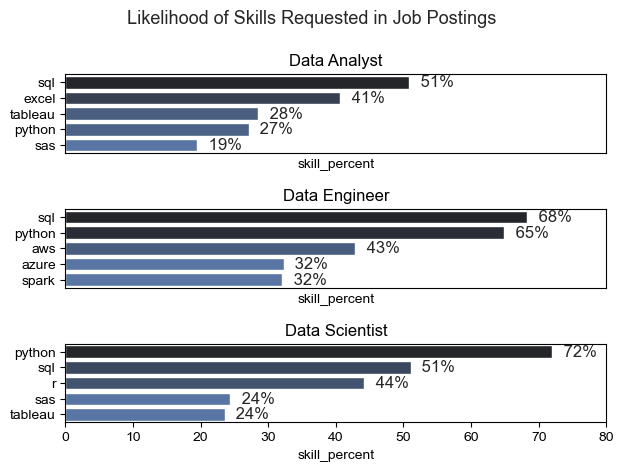

In [11]:
fig , ax = plt.subplots(len(job_titles),1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)
    sns.barplot(df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_percent', palette='dark:b_r', legend=False) 
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,80)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1, n, f'{v: .0f}%', va='center')
    
    if i!= len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in Job Postings', fontsize=13)
fig.tight_layout()
plt.show()